In [8]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [9]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-01-10 22:34:42--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-01-10 22:34:42 (94.8 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [10]:
#Replace categorical data to numbers
dataset = dataset.replace({"male": 0, "female": 1, "yes": 1, "no": 0, "northwest": 0, "northeast": 1, "southeast": 2, "southwest": 3 })

#create the train and test
train_dataset = dataset.sample(frac=0.8)
test_dataset = dataset.sample(frac=0.2)

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 316 to 739
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   int64  
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   int64  
 5   region    1070 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 58.5 KB
None


In [11]:
train_dataset, train_labels

(      age  sex   bmi  children  smoker  region
 316    50    0  32.2         0       0       0
 744    50    0  26.4         0       0       0
 393    49    0  31.4         1       0       1
 980    54    0  25.5         1       0       1
 1016   19    1  24.6         1       0       0
 ...   ...  ...   ...       ...     ...     ...
 1112   48    1  25.9         3       1       2
 784    31    1  29.3         1       0       2
 474    54    0  25.1         3       1       3
 40     24    1  26.6         0       0       1
 739    29    0  35.5         2       1       3
 
 [1070 rows x 6 columns],
 316      8835.26
 744      8827.21
 393      9290.14
 980     25517.11
 1016     2709.24
           ...   
 1112    24180.93
 784      4350.51
 474     25382.30
 40       3046.06
 739     44585.46
 Name: expenses, Length: 1070, dtype: float64)

In [12]:
#create the model
model = keras.Sequential([
    layers.Dense(124, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

#compile
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 124)               868       
                                                                 
 dense_7 (Dense)             (None, 64)                8000      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 21413 (83.64 KB)
Trainable params: 21413

In [13]:
#fit the model
model.fit(train_dataset, train_labels, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 315256512.0000 - mae: 12786.7314 - mse: 315256512.0000
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 172162208.0000 - mae: 8684.4082 - mse: 172162208.0000
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 135331168.0000 - mae: 9318.8525 - mse: 135331168.0000
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 135093472.0000 - mae: 9274.8945 - mse: 135093472.0000
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 134376352.0000 - mae: 9278.1914 - mse: 134376352.0000
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 133481104.0000 - mae: 9298.2344 - mse: 133481104.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 133809600.0000 - mae: 9200.8643 - mse: 133809600.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 133746528.0000 - mae: 9411.0898 - mse

9/9 - 0s - loss: 29303520.0000 - mae: 2955.0591 - mse: 29303520.0000 - 163ms/epoch - 18ms/step
Testing set Mean Abs Error: 2955.06 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


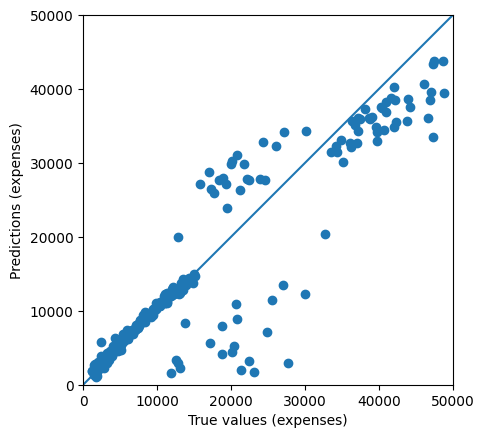

In [14]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
